# Pyam Integration

*Note:* These notebooks will be re-written as part of our [first milestone](https://github.com/openclimatedata/openscm/milestone/1)

Here we make use of the ``scenarios`` module of OpenSCM. However, keep in mind the [direct connection to the IIASA database made available in Pyam](https://pyam-iamc.readthedocs.io/en/latest/tutorials/iiasa_dbs.html) for more in-depth analysis with up-to-date scenarios.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
import pyam
import seaborn as sns

from pyam import IamDataFrame
from openscm import run
from openscm.scmdataframe import ScmDataFrame
from openscm.scenarios import rcps

<IPython.core.display.Javascript object>

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm/venv/lib/python3.7/site-packages/sphinxcontrib: missing __init__
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm/venv/lib/python3.7/site-packages/mpl_toolkits: missing __init__


In [2]:
sns.set(style="darkgrid")

## Scenarios

Here we use the RCPs. Just for illustration, we firstly convert them back to `pyam.IamDataFrame`, then show how OpenSCM works with IamDataFrames from this point onwards.

*Note:* we have to filter the data first as IamDataFrames do not work with data outside of Panda's datetime bounds (see [here](https://stackoverflow.com/a/37226672)). 

In [3]:
df = IamDataFrame(rcps.filter(year=range(1, 2201)).timeseries())
type(df)

pyam.core.IamDataFrame

### Pyam features

The following cells provide a brief overview of the metadata and plots that can be examined with a `pyam.IamDataFrame`.

In [4]:
# NBVAL_IGNORE_OUTPUT
df["variable"].unique()

array(['Emissions|BC', 'Emissions|C2F6', 'Emissions|C6F14',
       'Emissions|CCl4', 'Emissions|CF4', 'Emissions|CFC11',
       'Emissions|CFC113', 'Emissions|CFC114', 'Emissions|CFC115',
       'Emissions|CFC12', 'Emissions|CH3Br', 'Emissions|CH3CCl3',
       'Emissions|CH3Cl', 'Emissions|CH4', 'Emissions|CO',
       'Emissions|CO2|MAGICC AFOLU',
       'Emissions|CO2|MAGICC Fossil and Industrial', 'Emissions|HCFC141b',
       'Emissions|HCFC142b', 'Emissions|HCFC22', 'Emissions|HFC125',
       'Emissions|HFC134a', 'Emissions|HFC143a', 'Emissions|HFC227ea',
       'Emissions|HFC23', 'Emissions|HFC245fa', 'Emissions|HFC32',
       'Emissions|HFC4310', 'Emissions|Halon1202', 'Emissions|Halon1211',
       'Emissions|Halon1301', 'Emissions|Halon2402', 'Emissions|N2O',
       'Emissions|NH3', 'Emissions|NMVOC', 'Emissions|NOx',
       'Emissions|OC', 'Emissions|SF6', 'Emissions|SOx'], dtype=object)

In [5]:
df["region"].unique()

array(['World'], dtype=object)

In [6]:
df["scenario"].unique()

array(['RCP60', 'RCP26', 'RCP85', 'RCP45'], dtype=object)

*Note:* For an explanation of the `parameter_type` column, see the 'timeseries-conversion' notebook.

In [7]:
# NBVAL_IGNORE_OUTPUT
df.timeseries().head()

1765-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.000000   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010763   

                                                                    1766-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.106998   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010752   

                                                                    1767-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.133383   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010748   

                                                                    1768-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.159847   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010744   

                                                                    1769-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.186393   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010740   

                                                                    1770-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.213024   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010736   

                                                                    1771-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.239742   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010731   

                                           

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

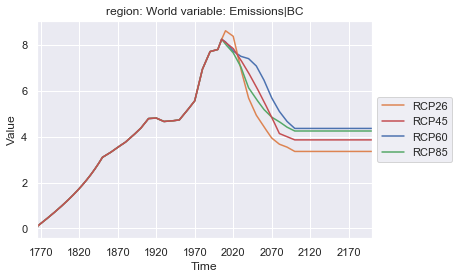

In [8]:
df.filter(variable='Emissions|BC').line_plot(
    x="time",
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a `pd.DataFrame` underneath the hood makes integration with other tools, like seaborn, trivial.

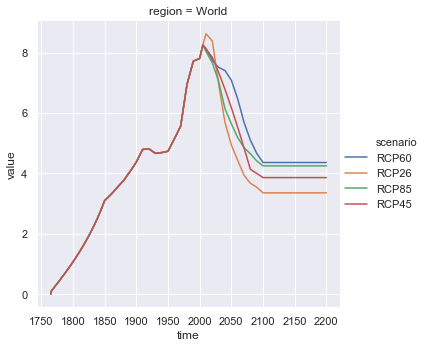

In [9]:
emissions_bc = df.filter(
    variable="Emissions|BC"
).data
sns.relplot(
    x="time",
    y="value",
    kind="line",
    col="region",
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);

## Running scenarios

OpenSCM can directly run scenarios from a `pyam.IamDataFrame` as shown.

In [10]:
for i, label in ScmDataFrame(df)[["model", "scenario"]].drop_duplicates().iterrows():
    print(label.to_dict())

{'model': 'AIM', 'scenario': 'RCP60'}
{'model': 'IMAGE', 'scenario': 'RCP26'}
{'model': 'MESSAGE', 'scenario': 'RCP85'}
{'model': 'MiniCAM', 'scenario': 'RCP45'}


In [11]:
output_iamdf = run(
    df, 
    ["PH99", "MAGICC6", "DICE"],
    output_time_points=[np.datetime64("{}-01-01".format(y)) for y in range(1800, 2151)],
)

Rounding PH99 timestep to nearest integer


Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries
Not returning parameters without units
Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries
Not returning parameters without units
Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries
Not returning parameters without units
Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries


Not returning parameters without units


In [12]:
type(output_iamdf)

openscm.scmdataframe.pyam_compat.LongDatetimeIamDataFrame

In [13]:
output_iamdf.head()

,model,scenario,region,variable,unit,time,climate_model,magicc6|core_climatesensitivity (delta_degc),radiative forcing 2xco2 (delta_degc * joule / a / kelvin / meter ** 2),magicc6|core_delq2xco2 (w/m^2),parameter_type,todo,equilibrium climate sensitivity (kelvin),value
0,AIM,RCP60,World,Atmospheric Concentrations|CH4,ppb,1800-01-01,MAGICC6,3.0,-999.0,3.71,point,N/A,-999.0,742.00075
1,AIM,RCP60,World,Atmospheric Concentrations|CH4,ppb,1801-01-01,MAGICC6,3.0,-999.0,3.71,point,N/A,-999.0,742.82581
2,AIM,RCP60,World,Atmospheric Concentrations|CH4,ppb,1802-01-01,MAGICC6,3.0,-999.0,3.71,point,N/A,-999.0,743.69409
3,AIM,RCP60,World,Atmospheric Concentrations|CH4,ppb,1803-01-01,MAGICC6,3.0,-999.0,3.71,point,N/A,-999.0,744.59779
4,AIM,RCP60,World,Atmospheric Concentrations|CH4,ppb,1804-01-01,MAGICC6,3.0,-999.0,3.71,point,N/A,-999.0,745.52913


In [14]:
output_iamdf.tail()

,model,scenario,region,variable,unit,time,climate_model,magicc6|core_climatesensitivity (delta_degc),radiative forcing 2xco2 (delta_degc * joule / a / kelvin / meter ** 2),magicc6|core_delq2xco2 (w/m^2),parameter_type,todo,equilibrium climate sensitivity (kelvin),value
28075,MiniCAM,RCP45,World,Surface Temperature Increase,delta_degC,2148-01-01,PH99,-999.0,116580000.0,-999.0,point,-999,3.547283,17.135057
28076,MiniCAM,RCP45,World,Surface Temperature Increase,delta_degC,2149-01-01,DICE,-999.0,-999.0,-999.0,point,-999,-999.000000,3.475934
28077,MiniCAM,RCP45,World,Surface Temperature Increase,delta_degC,2149-01-01,PH99,-999.0,116580000.0,-999.0,point,-999,3.547283,17.132120
28078,MiniCAM,RCP45,World,Surface Temperature Increase,delta_degC,2150-01-01,DICE,-999.0,-999.0,-999.0,point,-999,-999.000000,3.474132
28079,MiniCAM,RCP45,World,Surface Temperature Increase,delta_degC,2150-01-01,PH99,-999.0,116580000.0,-999.0,point,-999,3.547283,17.129081


In [15]:
output_scmdf =  run(
    ScmDataFrame(df), 
    ["PH99", "DICE", "MAGICC6"],
)
type(output_scmdf)

Rounding PH99 timestep to nearest integer


Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries
Not returning parameters without units
Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries
Not returning parameters without units
Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries
Not returning parameters without units
Ignoring input data which is not required for .SCEN file
MAGICC6 hard-coded to start in 1765 as there is a conflict between the concept of a start year and having continuous timeseries
Not returning parameters without units


openscm.scmdataframe.ScmDataFrame

In [16]:
output_scmdf.head()

,,,,,,,,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,2091-01-01 00:00:00,2092-01-01 00:00:00,2093-01-01 00:00:00,2094-01-01 00:00:00,2095-01-01 00:00:00,2096-01-01 00:00:00,2097-01-01 00:00:00,2098-01-01 00:00:00,2099-01-01 00:00:00,2100-01-01 00:00:00
model,scenario,region,variable,unit,climate_model,equilibrium climate sensitivity (kelvin),magicc6|core_climatesensitivity (delta_degc),magicc6|core_delq2xco2 (w/m^2),parameter_type,radiative forcing 2xco2 (delta_degc * joule / a / kelvin / meter ** 2),todo,,,,,,,,,,,,,,,,,,,,,
AIM,RCP60,World,Radiative Forcing|CO2,W/m^2,DICE,-999.0,-999.0,-999.0,average,-999.0,-999,2.142363,2.123934,2.105980,2.088467,2.071411,2.054835,2.038691,2.022963,2.007659,1.992799,...,5.908613,5.927994,5.947038,5.965713,5.984040,6.002060,6.019758,6.037123,6.054185,6.070784
IMAGE,RCP26,World,Radiative Forcing|CO2,W/m^2,DICE,-999.0,-999.0,-999.0,average,-999.0,-999,2.142363,2.123934,2.105980,2.088467,2.071411,2.054835,2.038691,2.022963,2.007659,1.992799,...,3.750885,3.739859,3.729016,3.718368,3.707881,3.697545,3.687371,3.677374,3.667532,3.657663
MESSAGE,RCP85,World,Radiative Forcing|CO2,W/m^2,DICE,-999.0,-999.0,-999.0,average,-999.0,-999,2.142363,2.123934,2.105980,2.088467,2.071411,2.054835,2.038691,2.022963,2.007659,1.992799,...,7.196448,7.235741,7.274491,7.312670,7.350333,7.387555,7.424301,7.460540,7.496335,7.531521
MiniCAM,RCP45,World,Radiative Forcing|CO2,W/m^2,DICE,-999.0,-999.0,-999.0,average,-999.0,-999,2.142363,2.123934,2.105980,2.088467,2.071411,2.054835,2.038691,2.022963,2.007659,1.992799,...,4.901488,4.898214,4.895193,4.892429,4.889896,4.887595,4.885525,4.883686,4.882069,4.880501
AIM,RCP60,World,Ocean Temperature Increase,delta_degC,DICE,-999.0,-999.0,-999.0,point,-999.0,-999,0.006800,0.010663,0.014615,0.018652,0.022778,0.026966,0.031223,0.035542,0.039933,0.044366,...,1.590753,1.600780,1.610889,1.621024,1.631210,1.641448,1.651763,1.662098,1.672479,1.682906


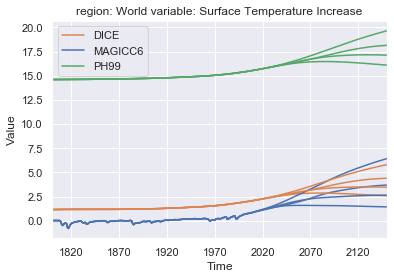

In [17]:
output_iamdf.filter(
    variable="Surface Temperature Increase"
).line_plot(x="time", color="climate_model");

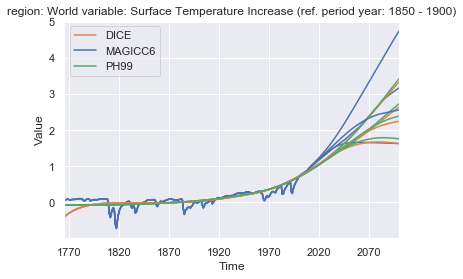

In [18]:
ScmDataFrame(output_scmdf.filter(
    variable="Surface Temperature Increase"
).relative_to_ref_period_mean(
    year=range(1850, 1901)
)).line_plot(color="climate_model");